In [1]:
import pandas as pd
df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

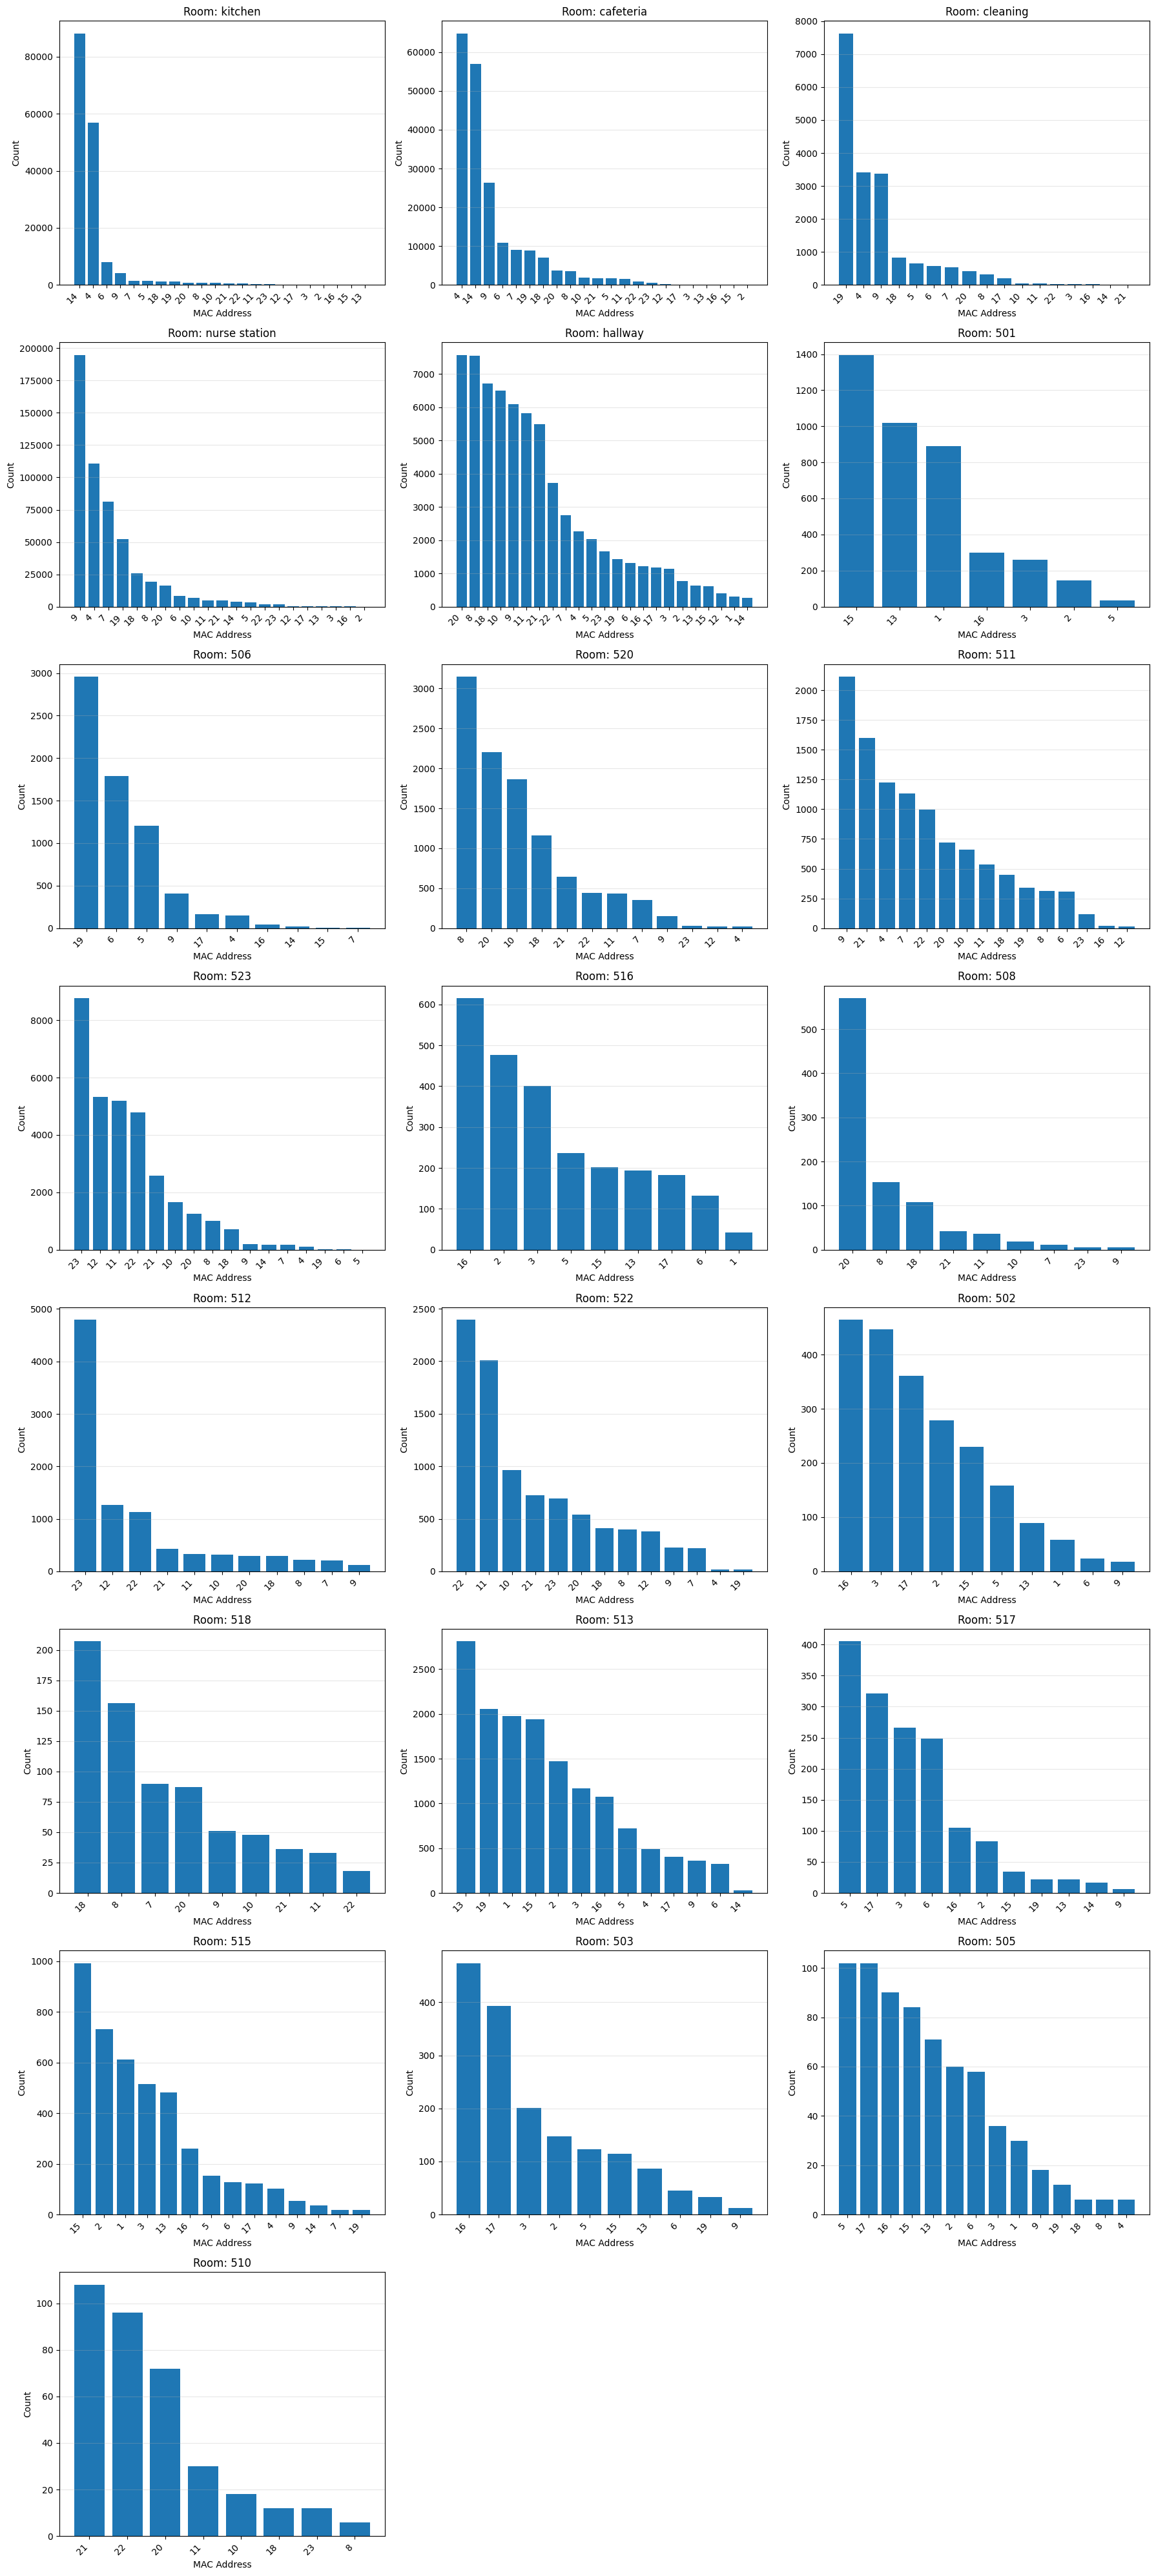

In [2]:
import matplotlib.pyplot as plt

# Group by room and get value counts of mac address for each room
rooms = df['room'].unique()
n_rooms = len(rooms)

# Create subplots - adjust layout based on number of rooms
n_cols = min(3, n_rooms)  # Max 3 columns
n_rows = (n_rooms + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

# Flatten axes array for easier iteration
if n_rooms == 1:
    axes = [axes]
elif n_rows == 1 or n_cols == 1:
    axes = axes.flatten()
else:
    axes = axes.flatten()

# Plot each room's MAC address distribution
for idx, room in enumerate(rooms):
    room_data = df[df['room'] == room]['mac address'].value_counts()
    
    axes[idx].bar(range(len(room_data)), room_data.values)
    axes[idx].set_title(f'Room: {room}')
    axes[idx].set_xlabel('MAC Address')
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(room_data)))
    axes[idx].set_xticklabels(room_data.index, rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide any unused subplots
for idx in range(n_rooms, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()